# Classification

* In this notebook we are going to use a very simple dataset and avoid the EDA (Exploratory Data Analysis) part wherever it is possible. 
* We will focus on introducing the main Machine Learning models and then suggest how they can be tuned in order to improve their performance.
* Finally, the main evaluation metrics are introduced.
* The code structure is as simple as possible, the processes are repeated many times due to pedagogical reasons, of course it can be supressed with the use of custom functions.

#### Import libraries, load data, basic data analysis, prepare data for the ML models

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, auc, confusion_matrix, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay


In [7]:
df = pd.DataFrame(pd.read_csv('./heart.csv'))

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Features meaning**

1. age
2. sex
3. chest pain type 
    * 0: asymptomatic
    * 1: atypical angina
    * 2: pain without relation to angina
    * 3: typical angina
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
    * true or false (1|0)
7. resting electrocardiographic results
    * 0: probable left ventricular hypertrophy
    * 1: normal
    * 2: abnormalities in the T wave or ST segment
8. maximum heart rate achieved during the stress test
9. exercise induced angina 
    * chest pain due to a blood flow reduction in the coronary arteries
    * yes or no (1|0)
10. oldpeak = ST depression induced by exercise relative to rest
    * The ST segment is a part of the electrocardiogram of a heart beat that is usually found at a certain level in a normal heart beat. A significant displacement of this segment can indicate the presence of a heart disease as we can see in the plot
11. the slope of the peak exercise ST segment
    * upsloping - uncommon
    * flatsloping - typical healthy heart
    * downsloping - signs of unhealthy heart
12. number of major vessels (0-3) colored by flourosopy
    * the number of narrow blood vessels seen, this is why the higher the value of this feature, the more likely it is to have a heart disease
    * the value 4 is wrong was replaced instead of NaN
13. thal:
    * 0 = is wrong, was replaced instead of NaN 
    * 1 = normal
    * 2 = fixed defect (no blood flow in some part of the heart)
    * 3 = reversable defect (a blood flow is observed but it is not normal)

Data Analysis part can be  found here -> https://www.kaggle.com/carlosdg/a-detail-description-of-the-heart-disease-dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**The task is to classify the patients whether they have heart disease or not !**

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


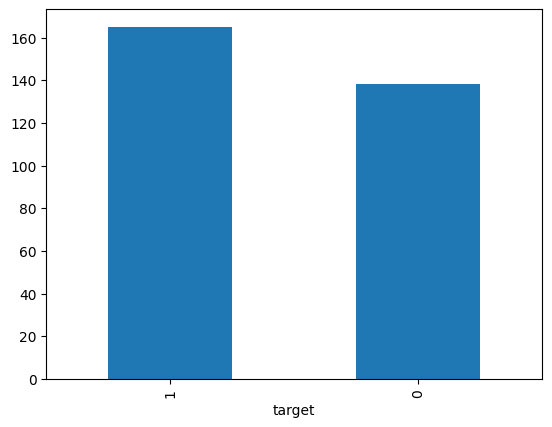

In [12]:
df.target.value_counts().plot(kind='bar');

In [13]:
X = df.drop(columns='target')
y = df.target

In [14]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### Create training and testing data set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle= True, random_state=42)

# Train - Predict - Evaluate Machine learning models

In [16]:
test_accuracy_list = []
train_accuracy_list = []
train_f1_list = []
test_f1_list = []

choose an estimator https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### Logistic regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
# Create linear regression object
log_reg = LogisticRegression(max_iter=2000)
# Train the model using the training sets
log_reg.fit(X_train, y_train)
# Make predictions using the training set
y_pred_lr_train = log_reg.predict(X_train)
# Make predictions using the testing set
y_pred_lr = log_reg.predict(X_test)

In [19]:
y_test = np.ravel(y_test)
y_pred_lr = np.ravel(y_pred_lr)

In [20]:
df_test_target = pd.DataFrame(data={'true value' : y_test , 'predicted value' : y_pred_lr})
df_test_target.head()

,true value,predicted value
0,0,0
1,0,1
2,1,1
3,0,0
4,1,1


#### Train metrics

<function matplotlib.pyplot.show(close=None, block=None)>

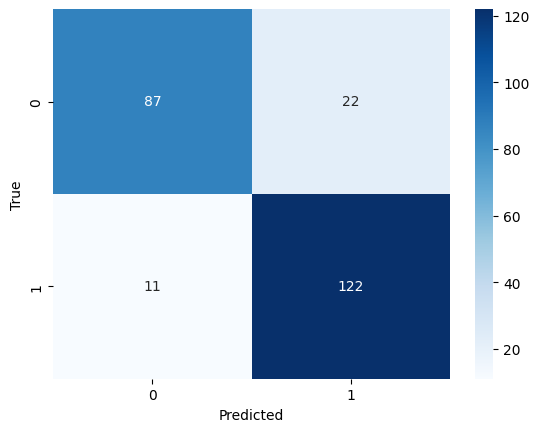

In [21]:
#create the confusion matrix
cf_matrix = confusion_matrix(y_train, y_pred_lr_train)

#plot the confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

In [22]:
train_accuracy = accuracy_score(y_train, y_pred_lr_train)
train_precision = precision_score(y_train, y_pred_lr_train)
train_recall = recall_score(y_train, y_pred_lr_train)
train_f1 = f1_score(y_train, y_pred_lr_train)

print('\ntrain_accuracy: ', train_accuracy)
print('\ntrain_precision: ', train_precision)
print('\ntrain_recall: ', train_recall)
print('\ntrain_f1: ', train_f1)


train_accuracy:  0.8636363636363636

train_precision:  0.8472222222222222

train_recall:  0.9172932330827067

train_f1:  0.8808664259927798


#### Test metrics

<function matplotlib.pyplot.show(close=None, block=None)>

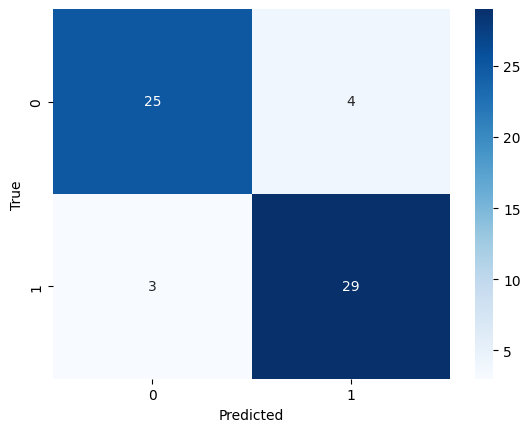

In [23]:
#create the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_lr)

#plot the confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

#### Summary

In [24]:
test_accuracy = accuracy_score(y_test, y_pred_lr)
test_precision = precision_score(y_test, y_pred_lr)
test_recall = recall_score(y_test, y_pred_lr)
test_f1 = f1_score(y_test, y_pred_lr)

print('\ntest_accuracy: ', test_accuracy)
print('\ntest_precision: ', test_precision)
print('\ntest_recall: ', test_recall)
print('\ntest_f1: ', test_f1)


test_accuracy:  0.8852459016393442

test_precision:  0.8787878787878788

test_recall:  0.90625

test_f1:  0.8923076923076924


Important conclusions : Test set has better performance than train set. Could be due to :
* Too small test set (use cross validation for small data!)
* Bad sampling of test set (could suffle once again)

In [26]:
test_accuracy_list.append(test_accuracy)
train_accuracy_list.append(train_accuracy)
train_f1_list.append(train_f1)
test_f1_list.append(test_f1)

In [27]:
feature_importance = dict(zip(X.columns, log_reg.coef_[0]))
feature_importance

{'age': np.float64(-0.007009059122022803),
 'sex': np.float64(-1.4087052885212092),
 'cp': np.float64(0.7926314667351851),
 'trestbps': np.float64(-0.01595126817743263),
 'chol': np.float64(-0.002925512454643575),
 'fbs': np.float64(0.16703705853269601),
 'restecg': np.float64(0.4796196053544062),
 'thalach': np.float64(0.018826152305115786),
 'exang': np.float64(-0.9505992911594748),
 'oldpeak': np.float64(-0.6460278328976069),
 'slope': np.float64(0.6308148750782813),
 'ca': np.float64(-0.7766339893748418),
 'thal': np.float64(-0.9161240211180214)}

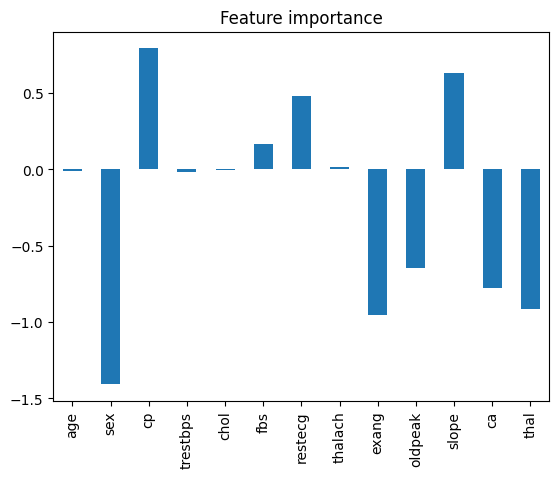

In [28]:
feature_df = pd.DataFrame(feature_importance, index=[0])
feature_df.T.plot.bar(title='Feature importance', legend=False);

It shows how each feature correlates with the target variable

### SVC

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [29]:
from sklearn import svm

In [30]:
#Create svr object
svc = svm.SVC(kernel='rbf')
#Train the model using the training set
svc.fit(X_train, y_train)
# Make predictions using the training set
y_pred_svc_train = svc.predict(X_train)
# Make predictions using the testing set
y_pred_svc = svc.predict(X_test)

#### Train metrics

<function matplotlib.pyplot.show(close=None, block=None)>

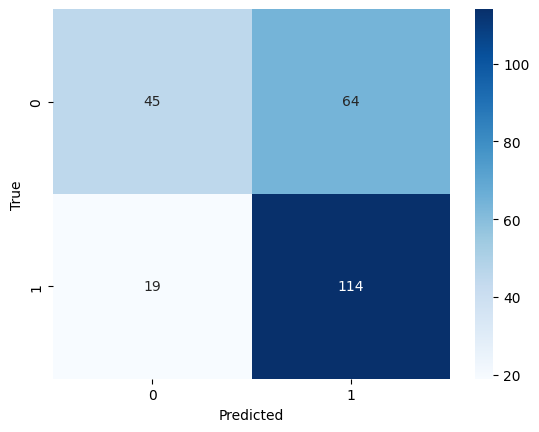

In [31]:
#create the confusion matrix
cf_matrix = confusion_matrix(y_train, y_pred_svc_train)

#plot the confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

In [32]:
train_accuracy = accuracy_score(y_train, y_pred_svc_train)
train_precision = precision_score(y_train, y_pred_svc_train)
train_recall = recall_score(y_train, y_pred_svc_train)
train_f1 = f1_score(y_train, y_pred_svc_train)

print('\ntrain_accuracy: ', train_accuracy)
print('\ntrain_precision: ', train_precision)
print('\ntrain_recall: ', train_recall)
print('\ntrain_f1: ', train_f1)


train_accuracy:  0.6570247933884298

train_precision:  0.6404494382022472

train_recall:  0.8571428571428571

train_f1:  0.7331189710610932


#### Test metrics

<function matplotlib.pyplot.show(close=None, block=None)>

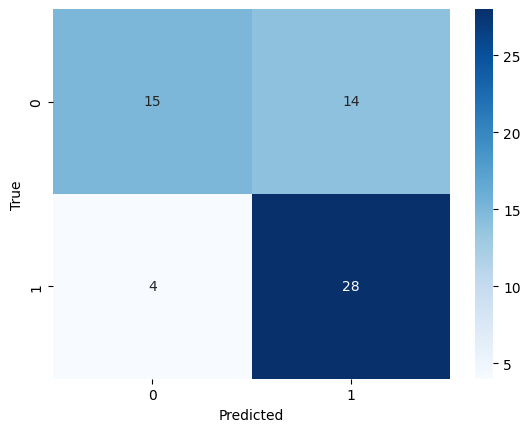

In [34]:
#create the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_svc)

#plot the confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

#### Summary

In [35]:
test_accuracy = accuracy_score(y_test, y_pred_svc)
test_precision = precision_score(y_test, y_pred_svc)
test_recall = recall_score(y_test, y_pred_svc)
test_f1 = f1_score(y_test, y_pred_svc)

print('\ntest_accuracy: ', test_accuracy)
print('\ntest_precision: ', test_precision)
print('\ntest_recall: ', test_recall)
print('\ntest_f1: ', test_f1)


test_accuracy:  0.7049180327868853

test_precision:  0.6666666666666666

test_recall:  0.875

test_f1:  0.7567567567567568


Again, we have important conclusions : Test set has better performance than train set. Could be due to :
* Too small test set (use cross validation for small data!)
* Bad sampling of test set (could suffle once again)

In [36]:
test_accuracy_list.append(test_accuracy)
train_accuracy_list.append(train_accuracy)
train_f1_list.append(train_f1)
test_f1_list.append(test_f1)

### K-Nearest Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
# Create k neighbors regression object
knc = KNeighborsClassifier(n_neighbors=3,weights='distance')
#Train the model using the training set
knc.fit(X_train, y_train)
# Make predictions using the training set
y_pred_knc_train = knc.predict(X_train)
# Make predictions using the testing set
y_pred_knc = knc.predict(X_test)

#### Train metrics

The negative class is well described, but it performs poorly on the positive class

<function matplotlib.pyplot.show(close=None, block=None)>

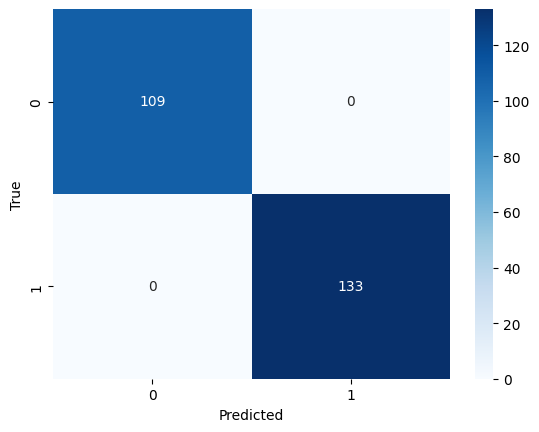

In [63]:
#create the confusion matrix
cf_matrix = confusion_matrix(y_train,y_pred_knc_train)

#plot the confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

In [61]:
train_accuracy = accuracy_score(y_train, y_pred_knc_train)
train_precision = precision_score(y_train, y_pred_knc_train)
train_recall = recall_score(y_train, y_pred_knc_train)
train_f1 = f1_score(y_train, y_pred_knc_train)

print('\ntrain_accuracy: ', train_accuracy)
print('\ntrain_precision: ', train_precision)
print('\ntrain_recall: ', train_recall)
print('\ntrain_f1: ', train_f1)


train_accuracy:  0.7603305785123967

train_precision:  0.7586206896551724

train_recall:  0.8270676691729323

train_f1:  0.7913669064748201


#### Test metrics

<function matplotlib.pyplot.show(close=None, block=None)>

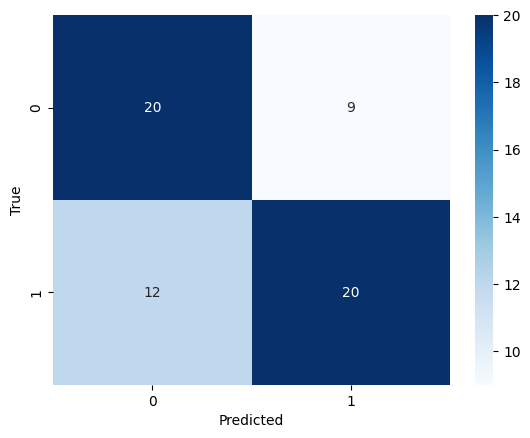

In [64]:
#create the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_knc)

#plot the confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

#### Summary

In [42]:
test_accuracy = accuracy_score(y_test, y_pred_knc)
test_precision = precision_score(y_test, y_pred_knc)
test_recall = recall_score(y_test, y_pred_knc)
test_f1 = f1_score(y_test, y_pred_knc)

print('\ntest_accuracy: ', test_accuracy)
print('\ntest_precision: ', test_precision)
print('\ntest_recall: ', test_recall)
print('\ntest_f1: ', test_f1)


test_accuracy:  0.639344262295082

test_precision:  0.7272727272727273

test_recall:  0.5

test_f1:  0.5925925925925926


In [43]:
test_accuracy_list.append(test_accuracy)
train_accuracy_list.append(train_accuracy)
train_f1_list.append(train_f1)
test_f1_list.append(test_f1)

It is only slightly better than random guessing (recall=0.5)!

5. Experiment with different number of neighbors

6. Weight parameter meaning

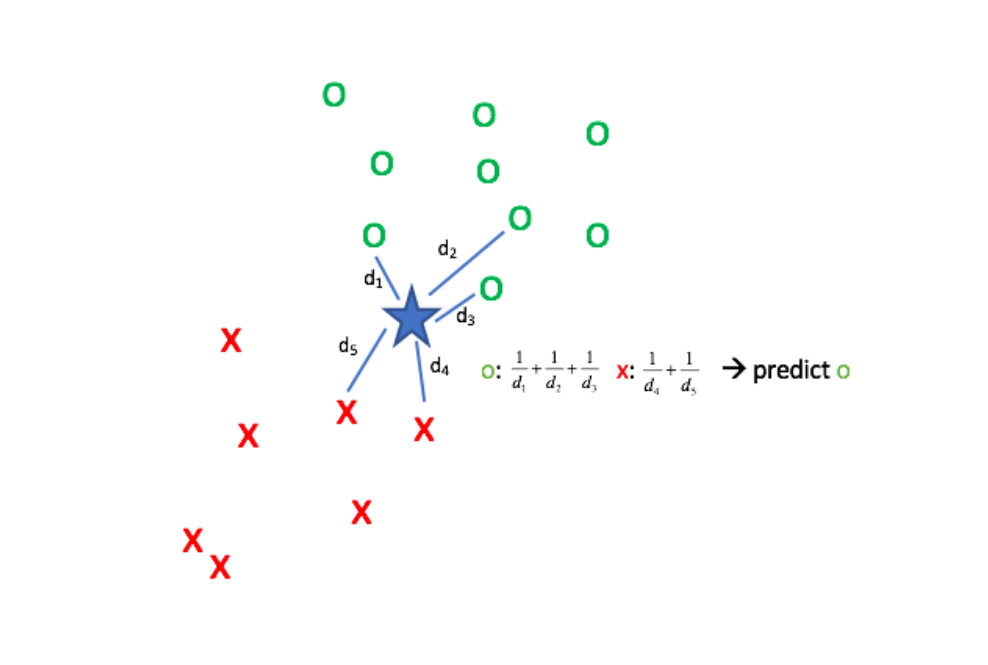

https://www.jeremyjordan.me/k-nearest-neighbors/

### Decision Tree Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [44]:
from sklearn import tree

In [45]:
# Create decision tree regression object
dtc = tree.DecisionTreeClassifier()
#Train the model using the training set
dtc = dtc.fit(X_train, y_train)

<function matplotlib.pyplot.show(close=None, block=None)>

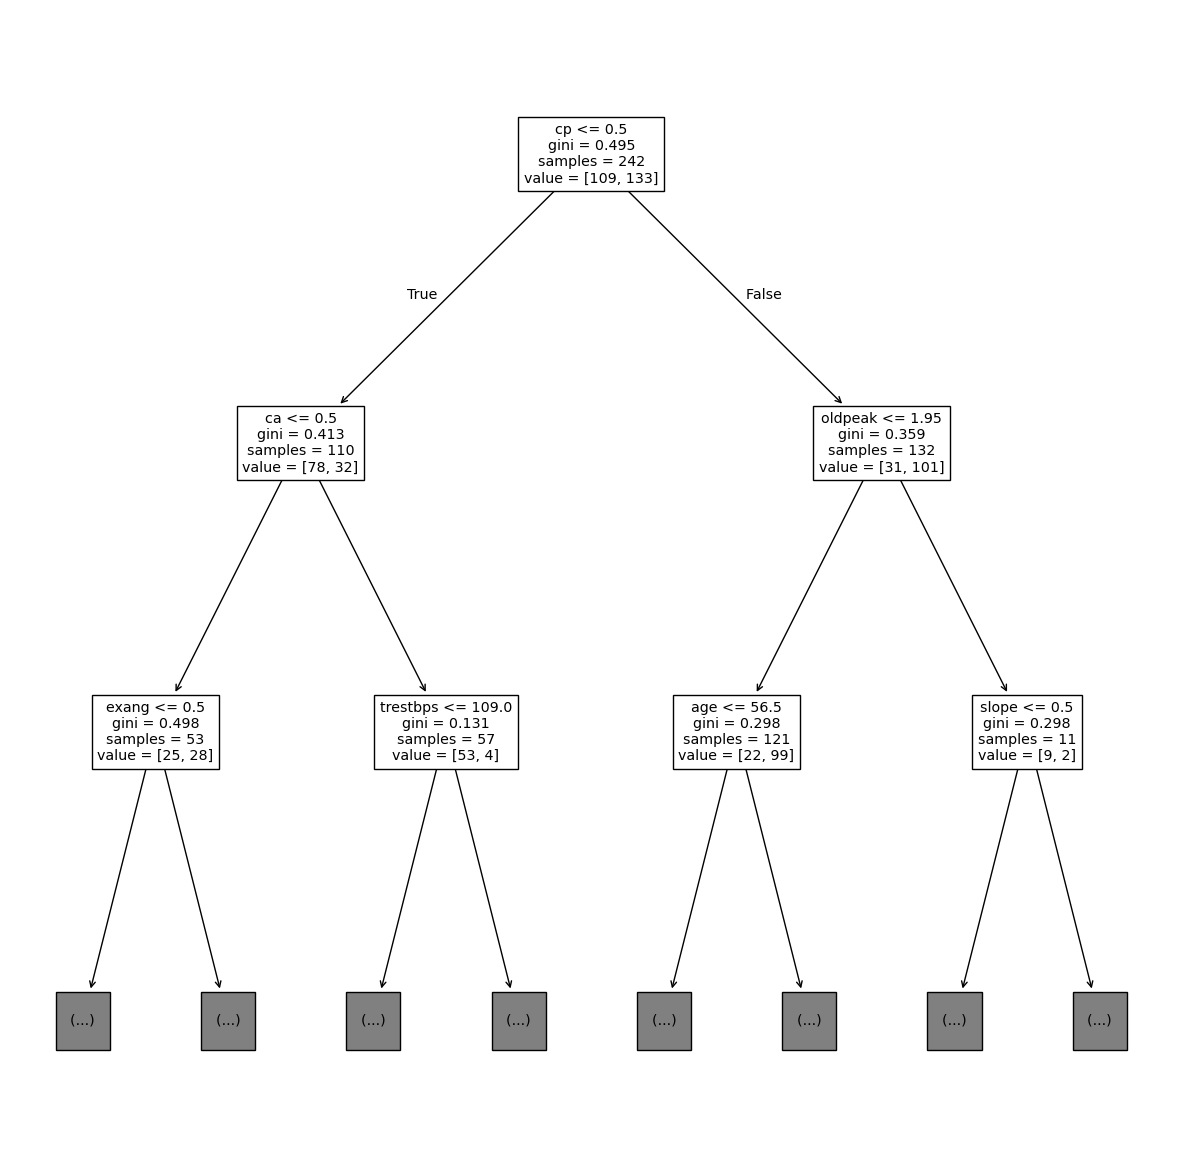

In [46]:
#Plot the decision tree = trained model
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(dtc, feature_names=X.columns, max_depth=2)
plt.show

In [47]:
# Make predictions using the training set
y_pred_dtc_train = dtc.predict(X_train)
# Make predictions using the testing set
y_pred_dtc = dtc.predict(X_test)

#### Train metrics

<function matplotlib.pyplot.show(close=None, block=None)>

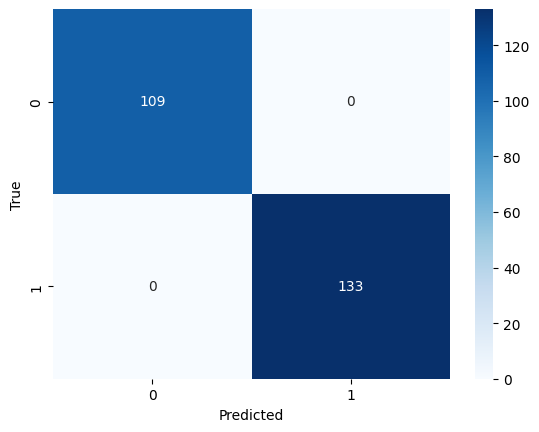

In [48]:
#create the confusion matrix
cf_matrix = confusion_matrix(y_train,y_pred_dtc_train)

#plot the confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

Perfect classification on the train set because max depth was not defined\
This means that the tree will expand until every node is pure (prone to overfitting!)

In [49]:
train_accuracy = accuracy_score(y_train, y_pred_dtc_train)
train_precision = precision_score(y_train, y_pred_dtc_train)
train_recall = recall_score(y_train, y_pred_dtc_train)
train_f1 = f1_score(y_train, y_pred_dtc_train)

print('\ntrain_accuracy: ', train_accuracy)
print('\ntrain_precision: ', train_precision)
print('\ntrain_recall: ', train_recall)
print('\ntrain_f1: ', train_f1)


train_accuracy:  1.0

train_precision:  1.0

train_recall:  1.0

train_f1:  1.0


#### Test metrics

<function matplotlib.pyplot.show(close=None, block=None)>

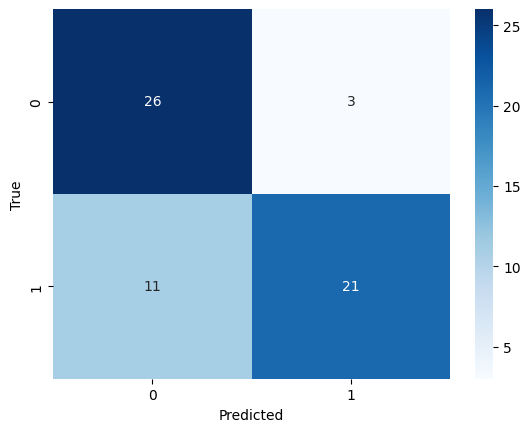

In [50]:
#create the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_dtc)

#plot the confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

We clearly see that overfitting makes us perform poorly on the positive class (represented in the **recall** metric)

In [51]:
test_accuracy = accuracy_score(y_test, y_pred_dtc)
test_precision = precision_score(y_test, y_pred_dtc)
test_recall = recall_score(y_test, y_pred_dtc)
test_f1 = f1_score(y_test, y_pred_dtc)

print('\ntest_accuracy: ', test_accuracy)
print('\ntest_precision: ', test_precision)
print('\ntest_recall: ', test_recall)
print('\ntest_f1: ', test_f1)


test_accuracy:  0.7704918032786885

test_precision:  0.875

test_recall:  0.65625

test_f1:  0.75


In [52]:
test_accuracy_list.append(test_accuracy)
train_accuracy_list.append(train_accuracy)
train_f1_list.append(train_f1)
test_f1_list.append(test_f1)

### Evaluation summary

In [53]:
df_evaluation = pd.DataFrame(data={'test accuracy' : test_accuracy_list,
                                   'train accuracy' : train_accuracy_list,
                                   'test f1 score' : test_f1_list,
                                   'train f1 list' : train_f1_list},
                             index=['LogisticReg', 'SVc', 'k-Nc', 'DTc'])
df_evaluation

,test accuracy,train accuracy,test f1 score,train f1 list
LogisticReg,0.885246,0.863636,0.892308,0.880866
SVc,0.704918,0.657025,0.756757,0.733119
k-Nc,0.639344,0.809917,0.592593,0.790909
DTc,0.770492,1.000000,0.750000,1.000000


8. Which is the best model ? Without tuning, the Logistic Regression performed best (both accuracy and f1 score) before the decision tree classifier. If we tune these methods, we might end up with a different ranking. Notice that the difference between train and test metrics are really small for Logistic Regression (so we are confident it will generalize well)

9. Normalise the data before using them to train the models and observe if there is any regressor that is affected from it.

https://medium.com/@rahul77349/feature-scaling-why-it-is-required-8a93df1af310